**AIVLE School 미니프로젝트**
### **통신 서비스 이용 고객의 <span style="color:darkgreen">이탈 여부</span> 예측 문제**
---

<br>

#### **<span style="color:red">[미션 안내]</span>**
* 고객 관련 데이터를 분석한 후 고객의 서비스 중단 또는 경쟁업체로의 이탈 여부를 예측하는 머신러닝, 딥러닝 모델을 만들고 결과를 예측하세요.

#### **<span style="color:red">[유의 사항]</span>**
* 각 문항의 답안코드는 반드시 '#여기에 답안코드를 작성하세요'로 표시된 cell에 작성해야 합니다.
* 제공된 cell을 추가/삭제하고 다른 cell에 답안코드를 작성 시 채점되지 않습니다.
* 반드시 문제에 제시된 가이드를 읽고 답안 작성하세요.
* 문제에 변수명이 제시된 경우 반드시 해당 변수명을 사용하세요.
* 문제와 데이터는 제3자에게 공유하거나 개인적인 용도로 사용하는 등 외부로 유출할 수 없으며 유출로 인한 책임은 응시자 본인에게 있습니다.

#### **<span style="color:red">[데이터 컬럼]</span>**
1. CustomerID: 고객ID
2. gender: 성별
3. SeniorCitizen: 고령자 여부 (1, 0)
4. Partner: 배우자가 있는 지 여부 (Yes, No)
5. Dependents: 부양가족 여부 (Yes, No)
6. Tenure: 서비스 사용 개월수
7. PhoneService: 폰서비스 이용여부 (Yes, No)
8. MultipleLines: 다회선 이용여부 (Yes, No, No phone service)
9. InternetService: 인터넷 서비스 제공업체 (DSL, Fiber optic, No)
10. OnlineSecurity: 온라인 보안 이용여부 (Yes, No, No internet service)
11. OnlineBackup:온라인 백업 이용여부 (Yes, No, No internet service)
12. DeviceProtection: 디바이스 보호 이용여부 (Yes, No, No internet service)
13. TechSupport: 기술지원 이용여부 (Yes, No, No internet service)
14. StreamingTV: 스트리밍TV 이용여부 (Yes, No, No internet service)
15. StreamingMovies: 스트리밍 영화 이용여부 (Yes, No, No internet service)
16. Contract: 접촉 주기 (Month-to-month, One year, Two years)
17. PaperlessBilling: 온라인 빌링 이용여부 (Yes, No)
18. PaymentMethod: 요금납부방법 (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19. MonthlyCharges: 월 이용요금
20. TotalCharges: 총 이용요금
21. Churn: 이탈여부 (Yes or No)

<br>

### 1. scikit-learn 패키지는 머신러닝 교육을 위한 최고의 파이썬 패키지입니다.
### scikit-learn를 별칭(alias) sk로 임포트하는 코드를 작성하고 실행하세요.

In [2]:
# 여기에 답안코드를 작성하세요.
import sklearn as sk

<br>

### 2. Numpy를 사용할 수 있도록 별칭(alias)을 pd로 해서 불러오세요.

In [3]:
# 여기에 답안코드를 작성하세요.
import numpy as np
import pandas as pd

<br>

### 3. 모델링을 위해 분석 및 처리할 데이터 파일을 읽어오려고 합니다.
### Pandas함수로 데이터 파일을 읽어 데이터프레임 변수명 df에 할당하는 코드를 작성하세요.
* churn_data.csv 파일을 읽어 데이터 프레임 변수명 df에 할당하세요.

In [4]:
# 여기에 답안코드를 작성하세요.
df = pd.read_csv("churn_data.csv")

<br>

### 4. df에서 불필요한 customerID 컬럼을 삭제하고 df1에 저장하세요.

In [5]:
# 여기에 답안코드를 작성하세요.

df1 = df.drop('customerID', axis=1)

<br>

### 5. df1의 TotalCharges 컬럼의 타입을 float로 변경하세요.
* TotalCharge의 컬럼 타입을 확인하는 코드를 작성하세요.
* ' ' 값을 0으로 변환하고 컬럼 타입을 float로 변경하세요.
* 전처리 후 데이터를 df2에 저장하세요.

In [6]:
# 여기에 답안코드를 작성하세요.

df1['TotalCharges'].replace(' ', 0, inplace=True)
df1['TotalCharges'] = df1['TotalCharges'].astype('float')
df2 = df1

<br>

### 6. df2에서 churn 컬럼의 데이터별 개수를 확인하는 코드를 작성하고 
### Yes, No를 각각 1, 0으로 변환한 후 df3에 저장하세요.

In [7]:
# 여기에 답안코드를 작성하세요.

print(df2['Churn'].value_counts())
df2['Churn'].replace({'Yes': 1, 'No': 0}, inplace=True)
df3 = df2

No     5174
Yes    1869
Name: Churn, dtype: int64


<br>

### 7. df3의 모든 컬럼에 대해 결측치를 확인하는 코드를 작성하고 결측치를 처리하세요.
* 결측치가 40% 이상인 컬럼은 컬럼을 삭제하세요.
* 결측치가 40% 미만인 컬럼은 결측치가 있는 row를 삭제하세요.
* 전처리한 데이터를 df4에 저장하세요.

In [8]:
# 여기에 답안코드를 작성하세요.

na_data = pd.DataFrame(df3.isna().sum() / len(df3) * 100, columns=['na_ratio'])
more_40_idx = na_data.loc[na_data['na_ratio'] >= 40].index[0]
df3.drop(more_40_idx, axis=1, inplace=True)

df4 = df3.dropna(axis=0)

<br>

### 8. df4에서 SeniorCitizen 컬럼을 bar 차트로 확인해보고 불균형을 확인해보세요. 
### SeniorCitizen 컬럼은 불균형이 심하므로 삭제하세요.

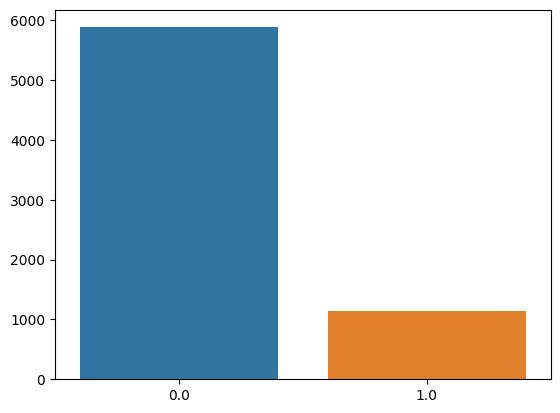

C:\Users\gkwjd\AppData\Local\Temp\ipykernel_39172\212751532.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop('SeniorCitizen', axis=1, inplace=True)


In [21]:
# 여기에 답안코드를 작성하세요.
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=df4['SeniorCitizen'].value_counts().index, y=df4['SeniorCitizen'].value_counts().values)
plt.show()

df4.drop('SeniorCitizen', axis=1, inplace=True)

<br>

In [32]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 1 to 7041
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7027 non-null   object 
 1   Partner           7027 non-null   object 
 2   Dependents        7027 non-null   object 
 3   tenure            7027 non-null   int64  
 4   PhoneService      7027 non-null   object 
 5   MultipleLines     7027 non-null   object 
 6   InternetService   7027 non-null   object 
 7   OnlineSecurity    7027 non-null   object 
 8   OnlineBackup      7027 non-null   object 
 9   TechSupport       7027 non-null   object 
 10  StreamingTV       7027 non-null   object 
 11  StreamingMovies   7027 non-null   object 
 12  Contract          7027 non-null   object 
 13  PaperlessBilling  7027 non-null   object 
 14  PaymentMethod     7027 non-null   object 
 15  MonthlyCharges    7027 non-null   float64
 16  TotalCharges      7027 non-null   float64


### 9. df4에서 다음의 가이드에 따라 데이터를 시각화 해보세요.
* tenure (서비스 사용기간)에 대해 히스토그램으로 시각화 하세요.
* tenure를 x 값으로 churn을 hue 값으로 사용하여 kdeplot으로 시각화 하고 '서비스 사용기간이 길어질 수록 이탈이 적다'에 대해 'O'인지 'X'인지 출력하세요.
* MultipleLines에 대해 countplot을 그리고 churn을 hue 값으로 사용하여 countplot으로 시각화 하고 'MultipleLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다'에 대해 'O'인지 'X'인지 출력하세요.
* 'tenure','MonthlyCharges','TotalCharges' 컬럼간의 상관관계를 확인하여 heatmap으로 시각화하고 가장 높은 상관계수 값을 출력하세요.

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247630,0.826172
MonthlyCharges,0.247630,1.000000,0.651049
TotalCharges,0.826172,0.651049,1.000000


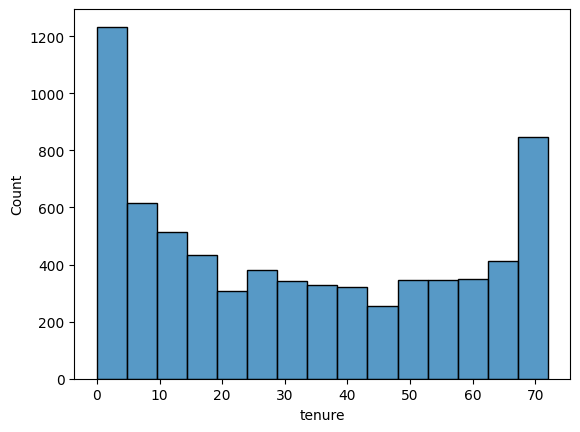

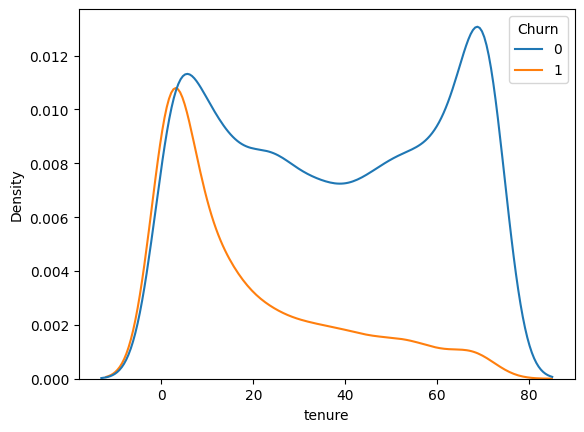

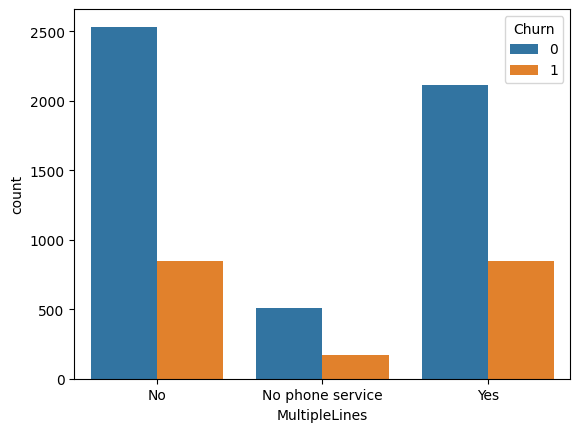

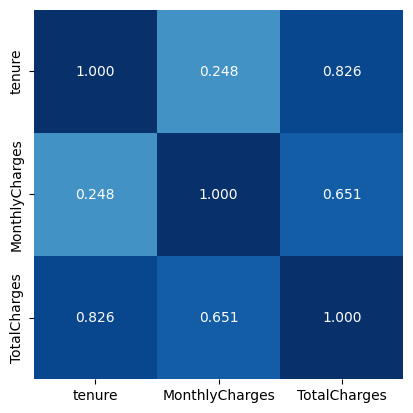

In [36]:
# 여기에 답안코드를 작성하세요.

sns.histplot(df4['tenure'])
plt.show()

sns.kdeplot(x='tenure', hue='Churn', data=df4)
plt.show()
# 서비스 사용기간이 길어질 수록 이탈이 적다 : O

sns.countplot(x='MultipleLines', hue='Churn', data=df4)
plt.show()
# MultiploeLines 서비스를 사용하는 고객이 약간 더 높은 이탈율을 보인다 : 이탈율이니까 O

corr_map = df4[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr_map,
            annot=True,
            fmt='.3f',
            cmap='Blues',
            cbar=False,
            vmin=-1, vmax=1,
            square=True)
plt.show()

<br>

### 10. df4에서 컬럼의 데이터 타입이 object인 컬럼들을 원-핫 인코딩하세요.
* 컬럼의 데이터 타입이 object인 컬럼들을 object_cols 변수에 저장하세요.
* object_cols 변수의 컬럼들을 원-핫 인코딩하세요.
* 전처리된 데이터를 df5에 저장하세요.

In [44]:
# 여기에 답안코드를 작성하세요.

object_cols = df4.dtypes.loc[df4.dtypes.values == 'O'].index.tolist()
df5 = pd.get_dummies(data=df4, columns=object_cols, drop_first=True)
df5.head(3)

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


<br>

### 11. df5에 대해 Scikit-learn의 train_test_split 함수로 훈련, 검증 데이터를 분리하세요.
* 입력 : X, y (y에는 churn을 저장하고 X에는 churn을 제외한 나머지를 저장하세요)
* Train : Test 비율 = 8:2
* y Class 비율에 맞게 나누는 옵션을 추가하세요.
* random_state=42 로 설정하세요.
* 결과 : X_train, X_valid, y_train, y_valid에 저장하세요.

In [88]:
# 여기에 답안코드를 작성하세요.
from sklearn.model_selection import train_test_split

X = df5.drop('Churn', axis=1)
y = df5.loc[:, 'Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

<br>

### 12. MinMaxScaler 함수를 'scaler'로 정의하고 데이터를 정규화하세요.

In [89]:
# 여기에 답안코드를 작성하세요.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

<br>

### 13. 고객 이탈 여부를 예측하는 머신러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* LogisticRegression 모델 정의하고 학습시키세요. 
* KNN으로 모델을 정의하고 학습시키세요. (n_neighbors=5)
* Decision Tree로 모델을 정의하고 학습시키세요. (max_depth=10, random_state=42)
* RandomForest로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)
* XGBoost로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* Light GBM으로 모델을 정의하고 학습시키세요. (n_estimators=3, random_state=42)  
* 각각 다른 셀에 답안코드를 작성하세요.

In [90]:
# 여기에 답안코드를 작성하세요.
# LogisticRegression

from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [91]:
# 여기에 답안코드를 작성하세요.
# KNN

from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
# 여기에 답안코드를 작성하세요.
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(max_depth=10, random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [93]:
# 여기에 답안코드를 작성하세요.
# Random Forest

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators=3, random_state=42)
model_RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [94]:
# 여기에 답안코드를 작성하세요.
# xgboost

from xgboost import XGBClassifier

model_XGB = XGBClassifier(n_estimators=3, random_state=42)
model_XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=3, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [95]:
# 여기에 답안코드를 작성하세요.
# lgbm

from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(n_estimators=3, random_state=42)
model_lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1493, number of negative: 4128
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 631
[LightGBM] [Info] Number of data points in the train set: 5621, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265611 -> initscore=-1.017006
[LightGBM] [Info] Start training from score -1.017006


LGBMClassifier(n_estimators=3, random_state=42)

### 14. 바로 위 모델의 성능을 평가하려고 합니다. 
### y값을 예측하여 confusion matrix를 구하고 heatmap 그래프로 시각화하세요. 
### 그리고 Scikit-learn의 classification_report를 활용하여 성능을 출력하세요.

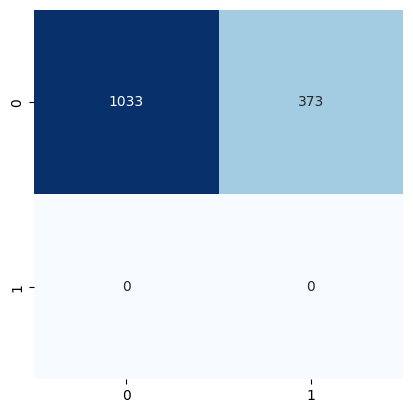

              precision    recall  f1-score   support

           0       1.00      0.73      0.85      1406
           1       0.00      0.00      0.00         0

    accuracy                           0.73      1406
   macro avg       0.50      0.37      0.42      1406
weighted avg       1.00      0.73      0.85      1406



c:\Users\gkwjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gkwjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gkwjd\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# 여기에 답안코드를 작성하세요.

from sklearn.metrics import confusion_matrix, classification_report

y_pred_lgbm = model_lgbm.predict(X_valid)
cm = confusion_matrix(y_pred_lgbm, y_valid)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=False,
            square=True)

plt.show()

print(classification_report(y_pred_lgbm, y_valid))

##### **<span style="color:red">다음 문항을 풀기 전에</span> 아래 코드를 실행하세요.**

In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

In [98]:
X_train.shape

(5621, 27)

### 15. 고객 이탈여부를 예측하는 딥러닝 모델을 만들려고 합니다.
### 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 손실함수는 MSE(Mean Squared Error)를 사용하세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 X_valid, y_valid 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [99]:
y_valid.shape

(1406,)

In [100]:
# 여기에 답안코드를 작성하세요.
from tensorflow.keras.backend import clear_session

clear_session()

X = Input(shape=(X_train.shape[1]))
H = Dense(32, activation='relu')(X)
H = Dropout(0.2)(H)
H = Dense(8, activation='relu')(H)
H = Dropout(0.2)(H)
Y = Dense(1, activation='sigmoid')(H)
model = Model(X, Y)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=[X_valid, y_valid])

Epoch 1/30
352/352 [==============================] - 1s 2ms/step - loss: 0.5223 - accuracy: 0.7319 - val_loss: 0.4550 - val_accuracy: 0.7817
Epoch 2/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.7872 - val_loss: 0.4454 - val_accuracy: 0.7831
Epoch 3/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4434 - accuracy: 0.7910 - val_loss: 0.4427 - val_accuracy: 0.7852
Epoch 4/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.7926 - val_loss: 0.4401 - val_accuracy: 0.7873
Epoch 5/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4325 - accuracy: 0.7974 - val_loss: 0.4353 - val_accuracy: 0.7909
Epoch 6/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4282 - accuracy: 0.8048 - val_loss: 0.4321 - val_accuracy: 0.7881
Epoch 7/30
352/352 [==============================] - 1s 2ms/step - loss: 0.4287 - accuracy: 0.8015 - val_loss: 0.4297 - val_accuracy: 0.7888
Epoch 

<br>

### 16. 위 딥러닝 모델의 성능을 평가하려고 합니다.
### Matplotlib 라이브러리 활용해서 학습 mse와 검증 mse를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

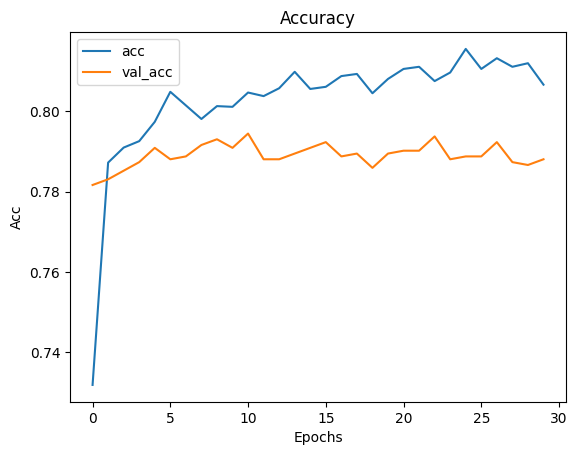

In [101]:
# 여기에 답안코드를 작성하세요.

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='acc')
plt.plot(val_accuracy, label='val_acc')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.